# UCI Demographic Analysis

The University of California, Irvine is a public school and therefore posts their data for the world to view. As someone who decided to live close to my alma mater post-graduation, I thought it would be interesting to see how the demographics of the school have changed over time using matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

First, I loaded the CSVs containing gender and ethnicity data using pandas.

In [2]:
file1 = "ethnicity.csv"
file2 = "gender.csv"

ethnicity_orig = pd.read_csv(file1)
ethnicity = ethnicity_orig.set_index("Year")
gender = pd.read_csv(file2)

I combined each sub-ethnicity into its larger ethnic group to make the data easier to manage.

In [3]:
ethnicity["Asian American"] = ethnicity["American Indian/Alaskan native"] + ethnicity["Chinese/Chinese-American"] + \
    ethnicity["East Indian/Pakistani"] + ethnicity["Filipino"] + ethnicity["Japanese/Japanese-American"] + \
    ethnicity["Korean"] + ethnicity["Polynesian/Pacific Islander"] + ethnicity["Thai/Other Asian"] + ethnicity["Vietnamese"]
    
ethnicity["Hispanic"] = ethnicity["Chicano/Mexican-American"] + ethnicity["Latino/other Spanish-American"]

summary = ethnicity[["Asian American", "Hispanic", "White, non-Hispanic", "Black, non-Hispanic"]]
summary

,Asian American,Hispanic,"White, non-Hispanic","Black, non-Hispanic"
Year,,,,
2008-09,11493.3,2837.0,5054.0,487.0
2009-10,11573.3,2963.0,4802.3,490.7
2010-11,11221.6,3256.3,4585.0,504.7
2011-12,11080.0,3818.0,4267.0,552.3
2012-13,10946.3,4230.7,3890.7,595.3
2013-14,10865.7,4923.6,3858.7,611.0
2014-15,10581.7,5653.0,3699.3,653.7
2015-16,9927.8,6029.0,3601.7,704.7
2016-17,10366.2,6877.6,3740.7,775.7


I chose to look at the changes in gender to start. It appears that there have always been more women than men, and that enrollment for both genders has been climbing at a very similar rate.

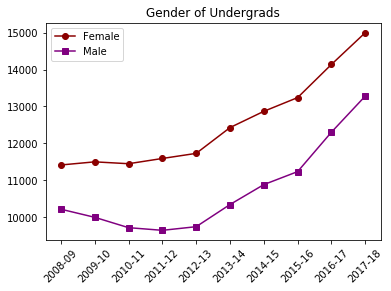

In [4]:
plt.plot(gender["Year"], gender["Female"], label="Female", c="darkred", marker="o")
plt.plot(gender["Year"], gender["Male"], label="Male", c="purple", marker="s")
plt.xticks(rotation='45')

plt.title("Gender of Undergrads")
plt.legend(loc="upper left")

plt.show()

Next I wanted to see the ethnic breakdown by year. It is very clear that Asian-Pacific Americans are the forefront of the student population - the school consistently has over 10,000 each year. Their large numbers make it more difficult to see the changes in the other populations.

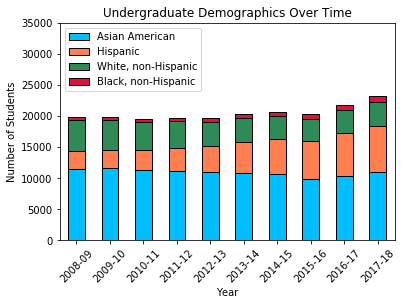

In [5]:
colors = ["deepskyblue", "coral", "seagreen", "crimson"]
summary.plot(kind="bar", stacked=True, color=colors, edgecolor="k")

plt.ylabel('Number of Students')
plt.title('Undergraduate Demographics Over Time')
plt.xticks(rotation='45')
plt.legend(loc="upper left")
plt.ylim(0, 35000)

plt.show()
plt.show()

I used a line plot to get a closer look at the remaining three ethnic groups. The Hispanic population has been growing rapidly since around 2011 and shows no sign of stopping. The White population has been steadily decreasing but has only dropped about 1,000 students over ten years. The Black population is incredibly low compared to all other ethnicities and has not increased by much at all, despite the rise in total enrollment. Perhaps UCI should look into campaigns to further entice this community to apply.

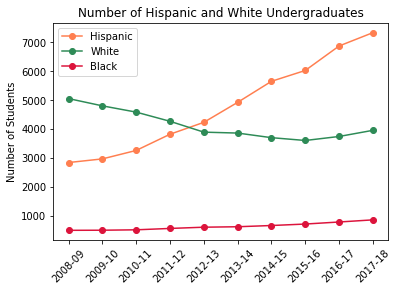

In [6]:
plt.plot(summary.index, summary["Hispanic"], label="Hispanic", c="coral", marker="o")
plt.plot(summary.index, summary["White, non-Hispanic"], label = "White", c="seagreen", marker="o")
plt.plot(summary.index, summary["Black, non-Hispanic"], label = "Black", c="crimson", marker="o")

plt.xticks(rotation='45')
plt.ylabel('Number of Students')
plt.title('Number of Hispanic and White Undergraduates')
plt.legend(loc="upper left")

plt.show()

In [7]:
ethnicity_orig.set_index("Year", inplace=True)

Unfortunately I was not able to include a very significant population of the undergraduate community in the above graphs: international students. They represented over 16% of the total undergraduate studate body in 2017-18, and yet no data was published on their enthic self-identification. It is hard to say what kind of impact they have on the look and feel of the school.

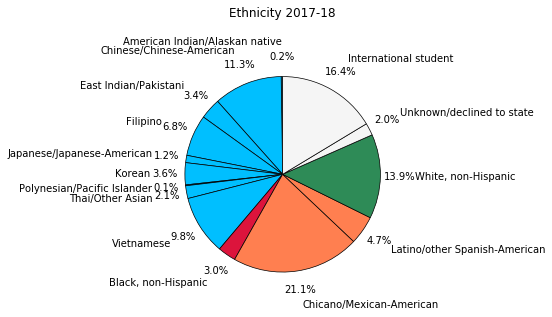

In [8]:
recent_data = ethnicity_orig.loc["2017-18"].values.tolist()
ethnic_labels = ethnicity_orig.columns
colors = ["deepskyblue","deepskyblue","deepskyblue","deepskyblue","deepskyblue","deepskyblue","deepskyblue",\
          "deepskyblue","deepskyblue","crimson","coral","coral","seagreen", "whitesmoke","whitesmoke"]

plt.pie(recent_data, 
        labels=ethnic_labels, 
        autopct="%1.1f%%", 
        startangle=90, 
        colors=colors, 
        pctdistance=1.2,
        labeldistance=1.35,
        wedgeprops={"edgecolor":"k",'linewidth': .7})
plt.axis("equal")
plt.title("Ethnicity 2017-18", y=1.2)

plt.show()